In [2]:
import pandas as pd
import numpy as np

In [3]:
# We will analyse the renamed "dmlz_assay" csv file in this notebook
DH_ROOT = '../data/ptfi_2/dh_and_bm_data/drillholes/'

assay = pd.read_csv(DH_ROOT + 'assay.csv')
bf = pd.read_csv(DH_ROOT + 'bulk_factor.csv')
bulk = pd.read_csv(DH_ROOT + 'bulk.csv')
collar = pd.read_csv(DH_ROOT + 'collar.csv')
survey = pd.read_csv(DH_ROOT + 'survey.csv')

---

Knowing what we know from the analysis of these dataframes, we want to convert them to drillhole objects with certain properties and information. It should ease the process of organising and eventually calculating individual heterogeneity.

Before removing any data, we just want to group by drillhole to see how we would go about combining/merging the data together. We can first create a grouping of drillholes by using the collar dataset.

---

In [4]:
collar.head()

,HOLEID,EAST,NORTH,ELEV,TD,AZI,INCLIN,ENDATE,COMPST,PROJ,CLIENT,CORING
0,DZ30-01GT-90,737277.996,9548950.851,3004.678,438.6,40.210,-48.439,12-Sep-2017,C,EESS,COWA,DD
1,DZ30-01SM-04,737664.303,9548767.564,3080.914,250.0,340.000,-44.920,22-Jan-2022,CG,EESS,COWA,DD
2,DZ30-03SM-02,736821.780,9549151.749,3092.879,550.0,354.712,-24.930,5-Aug-2022,CG,EESS,COWA,DD
3,DZ30-N0F-01,737494.450,9549029.078,3076.972,490.0,346.610,-64.217,18-Apr-2019,C,EESS,COWA,DD
4,DZ31-EJ4-917,737225.946,9549221.306,3104.496,397.2,103.520,-63.089,19-Sep-2020,C,EESS,COWA,DD


---

We can try to group the data in other datasets using the 'HOLEID' column in this dataframe as every dataframe has a 'HOLEID' column. We'll try it first with one drillhole. The second entry was selected as the first one doesn't seem to contain much information.

---

In [5]:
dh = collar.iloc[1, 0]
dh_collar = collar.iloc[1, 1:]
collar.iloc[1]

HOLEID    DZ30-01SM-04
EAST        737664.303
NORTH      9548767.564
ELEV          3080.914
TD               250.0
AZI              340.0
INCLIN          -44.92
ENDATE     22-Jan-2022
COMPST              CG
PROJ              EESS
CLIENT            COWA
CORING              DD
Name: 1, dtype: object

In [6]:
dh_assay = assay.query('HOLEID == @dh').iloc[:, 1:].sort_values(by=['FROM']).reset_index(drop=True)
dh_assay

,FROM,TO,INTLEN,SAMPID,CU,AU,AG
0,0.8,3.8,3.0,816694,0.4531,0.29,2.4
1,3.8,6.3,2.5,816695,0.0622,0.04,0.3
2,6.3,8.8,2.5,816696,1.8893,0.46,8.9
3,8.8,11.4,2.6,816697,1.9882,0.42,10.1
4,11.4,14.4,3.0,816698,2.2500,0.64,11.1
...,...,...,...,...,...,...,...
74,235.1,238.6,3.5,816774,0.5305,0.40,2.6
75,238.6,242.0,3.4,816775,0.5763,0.52,2.0
76,242.0,245.0,3.0,816776,0.3523,0.22,1.2
77,245.0,247.5,2.5,816777,0.7027,0.62,2.5


In [7]:
dh_bf = bf.query('HOLEID == @dh').iloc[:, 1:].sort_values(by=['FROM']).reset_index(drop=True)
dh_bf

,FROM,TO,INTLEN,BITSIZ,RECOV,BULK_F
0,0.0,0.1,0.1,HQ,100.0,0.923
1,0.1,0.8,0.7,HQ,100.0,0.923
2,0.8,1.5,0.7,HQ,100.0,0.990
3,1.5,2.4,0.9,HQ,100.0,0.990
4,2.4,4.0,1.6,HQ,100.0,0.990
...,...,...,...,...,...,...
91,239.4,242.4,3.0,HQ,100.0,0.933
92,242.4,244.2,1.8,HQ,100.0,0.931
93,244.2,245.4,1.2,HQ,100.0,0.965
94,245.4,248.4,3.0,HQ,100.0,0.897


In [8]:
dh_bf.RECOV.unique()

array([100.  ,  93.33,  95.  ])

In [9]:
dh_bulk = bulk.query('HOLEID == @dh').iloc[:, 1:].sort_values(by=['FROM']).reset_index(drop=True)
dh_bulk

,FROM,TO,INTLEN,DENSTY
0,0.8,3.8,3.0,3.0007
1,3.8,6.3,2.5,3.1287
2,6.3,8.8,2.5,3.2932
3,8.8,11.4,2.6,3.3393
4,11.4,14.4,3.0,3.5328
...,...,...,...,...
78,235.1,238.6,3.5,2.6033
79,238.6,242.0,3.4,2.5048
80,242.0,245.0,3.0,2.5027
81,245.0,247.5,2.5,2.5470


In [10]:
dh_survey = survey.query('HOLEID == @dh').iloc[:, 1:].sort_values(by=['DEPTH']).reset_index(drop=True)
dh_survey

,DEPTH,AZIM,DIP,METD
0,0.0,340.00,-44.92,SPRINT IQ
1,3.0,339.99,-45.14,SPRINT IQ
2,6.0,340.12,-45.24,SPRINT IQ
3,9.0,340.02,-45.23,SPRINT IQ
4,12.0,340.17,-45.26,SPRINT IQ
...,...,...,...,...
80,240.0,340.80,-46.27,SPRINT IQ
81,243.0,340.59,-46.41,SPRINT IQ
82,246.0,340.59,-46.41,PROJECTED
83,249.0,340.59,-46.41,PROJECTED


---

We can now try put all of this information into a DrillHole object.

---

In [11]:
class DrillHole:
    def __init__(self, holeid, assay, bf, bulk, collar, survey):
        self.holeid = holeid
        self.assay = assay
        self.bf = bf
        self.bulk = bulk
        self.collar = collar
        self.survey = survey
        
drillhole = DrillHole(dh, dh_assay, dh_bf, dh_bulk, dh_collar, dh_survey)

In [12]:
drillhole.collar

EAST       737664.303
NORTH     9548767.564
ELEV         3080.914
TD              250.0
AZI             340.0
INCLIN         -44.92
ENDATE    22-Jan-2022
COMPST             CG
PROJ             EESS
CLIENT           COWA
CORING             DD
Name: 1, dtype: object

---

We can now retreive the relevant information from a DrillHole object, however, it might be possible to combine some of the data together as well.

We can see that collar contains x, y, z data (`EAST`, `NORTH`, and `ELEV`), which can be combined with survey's `DEPTH`, `AZIM`, and `DIP`, along with the survey method to determine positional data at a given depth.

This depth data, in the form of `FROM`, and `TO` is found in the remaining data. 

---

<AxesSubplot:>

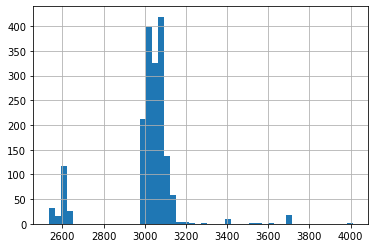

In [16]:
collar['ELEV'].hist(bins=50)